#Mounting the Google Drive in the runtime's virtual machine
mount with the google drive so that google colab can acccess the file in google drive

In [ ]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


#Import library to unzip the file
unzip the file and save in a temporary directory

In [ ]:
import os
import zipfile

local_zip = '/content/drive/MyDrive/Birds/Train.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

local_zip = '/content/drive/MyDrive/Birds/Test.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
TrainPath = '/tmp/Train'
TestPath = '/tmp/Test'

In [ ]:
train_fnames = os.listdir(TrainPath)
print(train_fnames[:10])

test_fnames = os.listdir(TestPath)
print(test_fnames[:10])


['Ringed_Kingfisher_0006_445049756.jpg', 'Bank_Swallow_0023_2647552341.jpg', 'White_eyed_Vireo_0032_2439903710.jpg', 'Cliff_Swallow_0001_1199523234.jpg', 'Grasshopper_Sparrow_0033_852523582.jpg', 'Pied_billed_Grebe_0020_397191373.jpg', 'Cerulean_Warbler_0008_2513907655.jpg', 'House_Wren_0007_2595202370.jpg', 'Cape_May_Warbler_0024_150760578.jpg', 'Seaside_Sparrow_0015_2636539368.jpg']
['0042.jpg', '0915.jpg', '0900.jpg', '1114.jpg', '0197.jpg', '0741.jpg', '0350.jpg', '1163.jpg', '0434.jpg', '0983.jpg']


In [ ]:
print('total training images:', len(train_fnames))
print('total testing images:', len(test_fnames))

total training images: 4829
total testing images: 1204


In [ ]:
# import the library
from os import listdir
from matplotlib import image
import tensorflow as tf
import numpy as np
from keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten,Dropout, Conv2D, BatchNormalization, MaxPooling2D
from tensorflow.keras import layers 
import datetime, os
import tensorflow as tf
from tensorflow.keras import models
from sklearn.model_selection import train_test_split
from keras import regularizers
#https://keras.io/api/applications/
from tensorflow import keras

#read the text file
train_info = '/content/drive/MyDrive/Birds/train.txt'
with open(train_info) as txt_file:
    lines =  [x.strip() for x in txt_file.readlines()]
x_train_path = [x.split(' ')[0] for x in lines]
y_train_label = [x.split(' ')[1] for x in lines]


test_info = '/content/drive/MyDrive/Birds/test.txt'
with open(test_info) as txt_file:
    lines =  [x.strip() for x in txt_file.readlines()]
x_test_path = [x.split(' ')[0] for x in lines]
y_test_label = [x.split(' ')[1] for x in lines]

In [ ]:
#split the image path to get the bird species name
total_bird_class = [x.split('_0')[0] for x in x_train_path]

#store it into a new list
bird_class = []
for i in total_bird_class:
  if i not in bird_class:
    bird_class.append(i)

In [ ]:
#import library
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
from keras.models import Sequential


In [ ]:
#list of image and label
train_images = []       
train_labels = []
shape = (200,200) 

train_path = TrainPath

#store the label into train_labels
train_labels = np.array(y_train_label)

#load the image into train_images
for filename in os.listdir('/tmp/Train'):

  img = cv2.imread(os.path.join(train_path, filename))

  # Resize all images to a specific shape
  img = cv2.resize(img, shape)

  train_images.append(img)

#converting labels into One Hot encoded sparse matrix
train_labels = pd.get_dummies(train_labels).values

#converting train_images into array
train_images = np.array(train_images)

#split the training set to train and validation sets
x_train,x_val,y_train,y_val = train_test_split(train_images,train_labels,random_state=1)

In [ ]:
#list of image and label
test_images = []
test_labels = []
shape = (200,200)

test_path = TestPath

#store the label into test_labels
test_labels = np.array(y_test_label)

for filename in os.listdir('/tmp/Test'):
  img = cv2.imread(os.path.join(test_path,filename))
        
  # Resize all images to a specific shape
  img = cv2.resize(img,shape)
        
  test_images.append(img)
        
# Converting test_images to array
test_images = np.array(test_images)

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


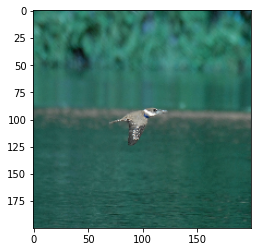

In [ ]:
print(train_labels[0])
plt.imshow(train_images[0])

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


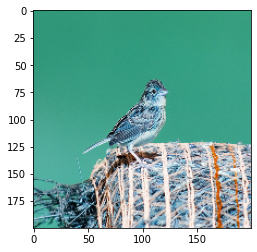

In [ ]:
print(train_labels[4])
plt.imshow(train_images[4])

In [ ]:
# Creating a Sequential model
model= Sequential()
#Convolutional layer
model.add(Conv2D(kernel_size=(3,3), filters=32, activation='tanh', input_shape=(200,200,3)))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
#Maxpooling layer
model.add(MaxPooling2D(2,2))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
#Flatten layer
model.add(Flatten())
#Fully connected layer
model.add(Dense(20,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(200,activation = 'softmax'))

#The model's loss function, matrics, optimizer
model.compile(
              loss='categorical_crossentropy', 
              metrics=['acc'],
              optimizer='adam'
             )

In [ ]:
# Model Summary
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 198, 198, 32)      896       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 196, 196, 30)      8670      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 98, 98, 30)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 96, 96, 30)        8130      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 48, 48, 30)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 46, 46, 30)        8130      
_________________________________________________________________
flatten_5 (Flatten)          (None, 63480)            

In [ ]:
#Train the model
history = model.fit(x_train,y_train,epochs=15,batch_size=64,validation_data=(x_val,y_val))

Epoch 1/15
57/57 [==============================] - 416s 7s/step - loss: 5.3129 - acc: 0.0044 - val_loss: 5.2987 - val_acc: 0.0058
Epoch 2/15
57/57 [==============================] - 425s 7s/step - loss: 5.2971 - acc: 0.0039 - val_loss: 5.2991 - val_acc: 0.0050
Epoch 3/15
57/57 [==============================] - 425s 7s/step - loss: 5.2960 - acc: 0.0066 - val_loss: 5.2996 - val_acc: 0.0058
Epoch 4/15
57/57 [==============================] - 436s 8s/step - loss: 5.2950 - acc: 0.0044 - val_loss: 5.3001 - val_acc: 0.0033
Epoch 5/15
57/57 [==============================] - 440s 8s/step - loss: 5.2940 - acc: 0.0064 - val_loss: 5.3006 - val_acc: 0.0033
Epoch 6/15
57/57 [==============================] - 436s 8s/step - loss: 5.2931 - acc: 0.0072 - val_loss: 5.3013 - val_acc: 0.0033
Epoch 7/15
57/57 [==============================] - 437s 8s/step - loss: 5.2923 - acc: 0.0072 - val_loss: 5.3020 - val_acc: 0.0033
Epoch 8/15
57/57 [==============================] - 431s 8s/step - loss: 5.2914 - a

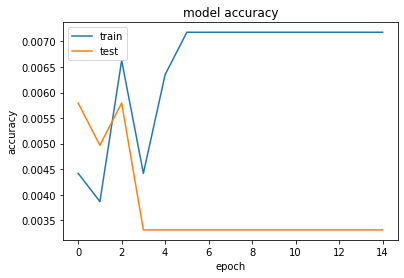

In [ ]:
#Show the model accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

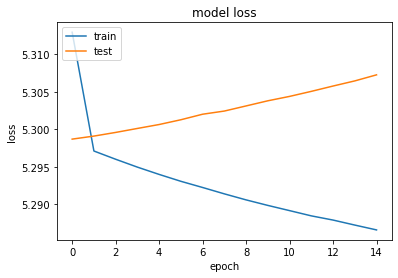

In [ ]:
#Show the model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#Returns the loss value & metrics values for the model in test mode.
evaluate = model.evaluate(x_val,y_val)
print(evaluate)

38/38 [==============================] - 31s 810ms/step - loss: 5.3073 - acc: 0.0033
[5.307254791259766, 0.0033112582750618458]


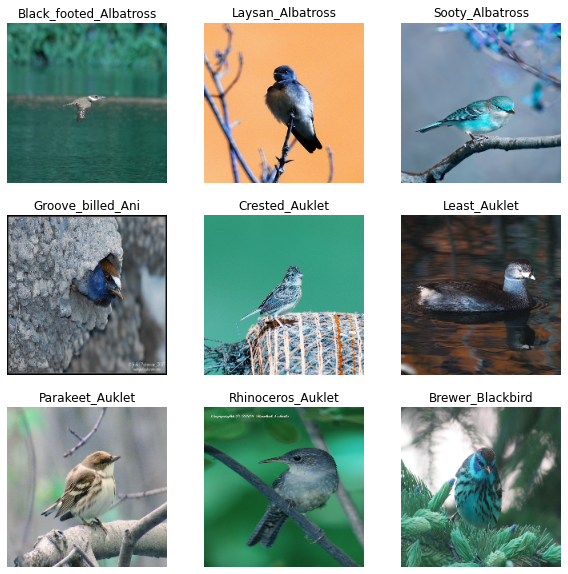

In [ ]:
#Show the image with the label
plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(train_images[i].astype("uint8"))
  plt.title(bird_class[i])
  plt.axis("off")